In [19]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

In [20]:
#load Dataset
data = pd.read_csv("Data_for_UCI_named.csv")
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [21]:
data.shape

(10000, 14)

In [22]:
data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [24]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


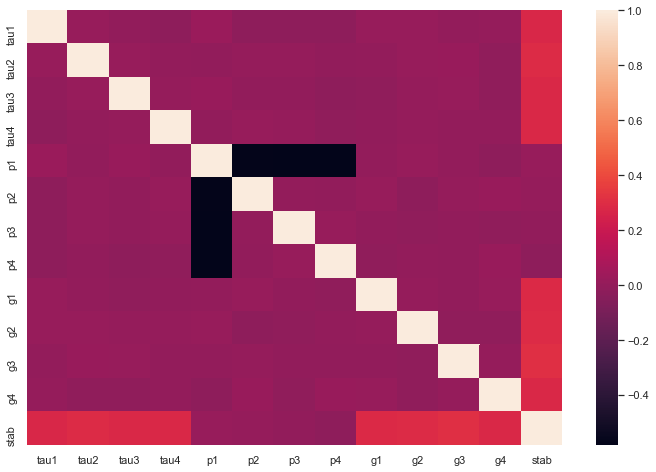

In [41]:
sns.heatmap(data.corr())

In [25]:
data["stabf"].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [27]:
# Question 1
TP = 255
FP = 1380
TN = 20
FN = 45

# calculating precision
precision = TP/(TP + FP)

# Calculating Recall
recall = TP/(TP + FN)

#calculting F1_Score
F1_Score = 2*((precision*recall)/(precision+recall))

print("F1_Score is: ", F1_Score)

F1_Score is:  0.2635658914728682


In [12]:
# Question 2
Ans 8

In [13]:
data.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [35]:
import sklearn.utils
from sklearn.model_selection import train_test_split

In [36]:
# Undersampling the target features

df_stable = data[data.stabf == "stable"]
df_unstable = data[data.stabf == "unstable"].sample(4000)
data_df = df_stable.append(df_unstable)

In [38]:
# More Preprocessing
X = data_df.drop(columns=["stab", "stabf"])
y = data_df["stabf"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
# Question 3
# Accuracy of random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

print("Accuracy: ", rfc.score(X_test, y_test))

Accuracy:  0.9142607174103237


In [ ]:
# Question 4
RMSE

In [17]:
# Accuracy of xgboost classifier
from xgboost import XGBClassifier
xgboost_clf = XGBClassifier()
clf.fit(X_train, y_train)

print("Accuracy: ", clf.score(X_test, y_test))

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Accuracy of lgbm classifier
from lightgbm import LGBMClassifier
light_clf = LGBMClassifier()
clf.fit(X_train, y_train)

print("Accuracy: ", clf.score(X_test, y_test))